<a href="https://www.kaggle.com/code/esmanuralican/titanik-eda?scriptVersionId=101243242" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt # görselleştirme için kullanılıyor
plt.style.use("seaborn-whitegrid") # seaborn-whitegrid ile görselleştir.

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore") # noktanın ardından tab'a basılarak kullanılabilcek seçenekler otomatik çıkacakdır(İnternet yavaş ise çalışmayabilir).  |  (ignore) : Python'dan kaynaklı uyarıları görmezden gel(tavsiye edilmez).


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Introduction
The sinking of the Titanic is one of the most infamous shipwrecks in history. In 1912, during her voyage the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.

<font color = 'blue' >
    Content:
   
1. [Load and Check Data](#1)     
1. [Variable Description](#2) 
    * [Univariate Variable Analysis](#3)   
        * [Categorical Variable ](#4)
        * [Numerical Variable ](#5)     
1. [Basic Data Analysis](#6)

<a id = "1"></a><br>
# Load and Check Data 


In [2]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
test_PassangerId  = test_df["PassengerId"] #PassengerId ifadesinin ilk değerinin kaybolmaması için bir değişkene atandı.


In [3]:
train_df.columns #features

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train_df.head() #ilk 5 verinin değerleri gösterildi.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.describe() # nümerik(sayısal) feature'lar ile ilgili istatistiksel bilgiler yazdırıldı.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id = "2"></a><br>
# Variable Description
1. PassengerId : Unique is number to each passenger
2. Survived : passenger survived(1) or die(0)
3. Pclass : passenger class
4. Name : name of passenger
5. Sex : gender of passenger
6. Age : age of passenger
7. SibSp : number of siblings/spouses
8. Parch : number of parents/ children
9. Ticket : ticket number
10. Fare : amount of money spent on ticket
11. Cabin : cabin category
12. Embarked : port where passenger embarked ( C=Cherbourg, Q=Queenstown, S=Southampton)

In [6]:
train_df.info() #data frame hakkında genel bilgi.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- float64(2) : Fare and Age
- int64(5) : Pclass , Sibsp ,  Parch , PassengerId and Survived
- object(5) : Name , Cabin , Sex , Embarked and Ticket

<a id = "3"></a><br>
# Univariate Variable Analysis
 * Categorical Variable : Survived(dead/live) , Sex(F/M) , Pclass , Embarked , Cabin , Name , Ticket , SibSp , Parch
 * Numerical Variable : Age , PassengerId , Fare(bilet fiyatı)

<a id = "4"></a><br>
## Categorical Variable

In [7]:
def bar_plot(variable):
    """
    input : variable ex: "Sex"
    output : bar plot & value count
    """
    # get feature
    var = train_df[variable]
    # count number of categorical variable(valu/sample)
    varValue = var.value_counts()#cinsiyetten kaç adet olduğunu göstermeye yarıyor
    
    #visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index , varValue) # herhangi bir feature içindeki seçenek sayısının gösterir. Ör: A listesinde 4 M ve 4 F olsun.
    plt.xticks(varValue.index , varValue.index.values) #xtixks : x'de bulunan tik sayısı
    plt.ylabel("Frequency") # ylabel : y ekseninde bulunan kategorilere ait sample sayısı
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable, varValue))
    
    

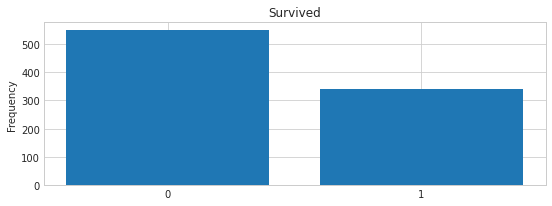

Survived: 
 0    549
1    342
Name: Survived, dtype: int64


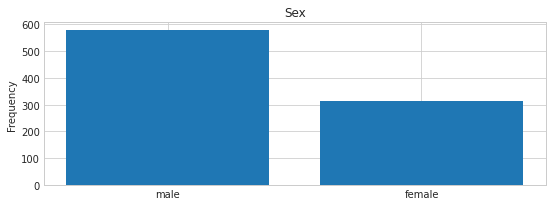

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


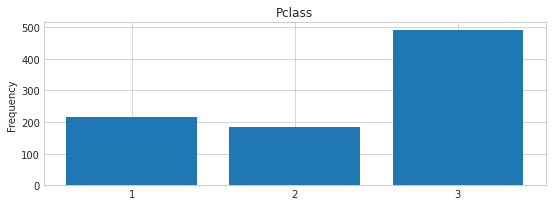

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


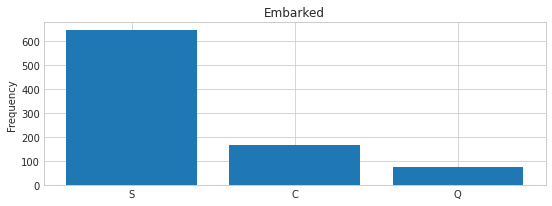

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


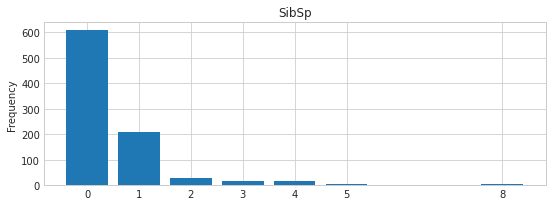

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


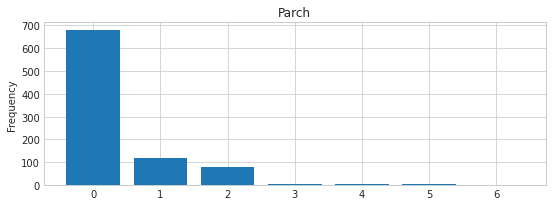

Parch: 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [8]:
category1 = ["Survived" , "Sex" , "Pclass" , "Embarked" , "SibSp" , "Parch"]
for c in category1:
    bar_plot(c)

In [9]:
category2 = ["Cabin" , "Name" , "Ticket"] #Aslında categorical olduğunu bilinen ama görselleştirme yapıldığı zaman çok karmaşa yaratacağından emin olunan categorical variable'ları gösterriyor
for c in category2:
    print("{} \n".format(train_df[c].value_counts()))

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64 

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64 

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64 



 <a id = "5"></a><br>
 ## Numerical Variable

In [10]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_df[variable]) #  plt.hist ile train.df'nin tüm variable'larını sırasıyla çağırıldı.
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distrubution with hist".format(variable))
    plt.show()

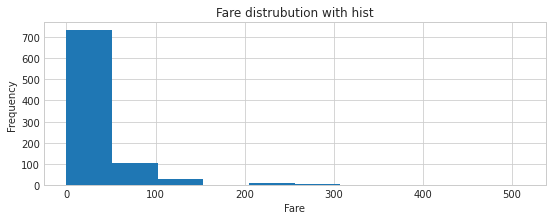

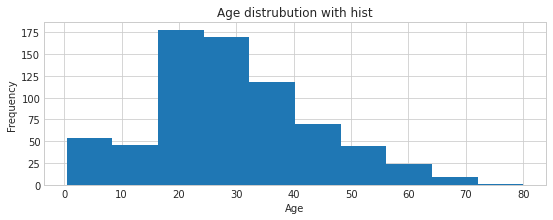

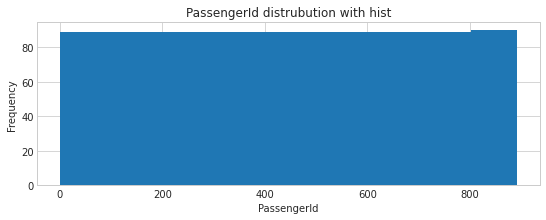

In [11]:
numericVar = ["Fare" , "Age" , "PassengerId"]
for n in numericVar:
    plot_hist(n)
    
    

<a id = "6"></a><br>
# Basic Data Analysis
* Pclass - Survived
* Sex - Survived
* SibSp -Survived
* Parch - Survived


In [12]:
#Pclass - Survived
train_df[["Pclass" , "Survived"]].groupby(["Pclass"], as_index = False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363
